# Prism coupling

As seen in a previous notebook on total internal reflection, when such a reflection occurs an evanescent wave is generated below the superstrate (which we will call the "prism" here). Total internal reflection is thus a way to generate an evanescent wave. This evanescent wave can then be used to excite any guided mode.

We first consider the excitation of a dielectric waveguide of thickness 500 nm. The prism (refractive index 1.5, just as the waveguide) is placed above the dielectric layer. We compute the reflectance of the whole structure to find at which angle to excite the guided mode. 

List of materials:
Simple, non dispersive: epsilon= 1.0
Simple, non dispersive: epsilon= 2.25


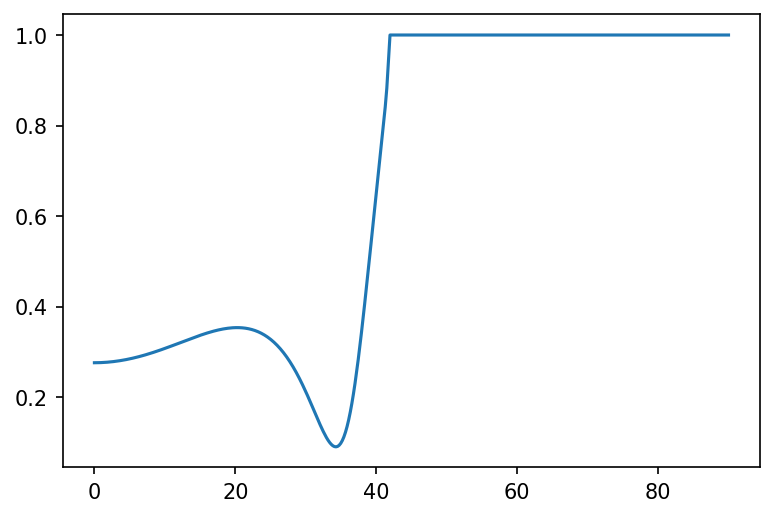

41.810314895778596

In [1]:
# Only for the present notebook... unnecessary 
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/code")

# Here it is !
from PyMoosh import *
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

wl = 600
prism_coupler = Structure([1.,2.25],[1,0,1,0],[1000,180,500,300])
incidence,r,t,R,T = Angular(prism_coupler,wl,0,0.,90.,400)
plt.plot(incidence,R)
plt.show()
asin(1/1.5)*180/pi

However, above the critical angle of 41.81°, not variation of the reflectance can be seen which would indicate the excitation of a guided mode. It is more relevant to consider the phase in that case, because the derivative of the phase $\phi$ with respect to $k_x = n k_0 \sin \theta$ is linked to the lateral shift of an incident beam : 
\begin{equation}
\delta = -\frac{d\,\phi}{d\, k_x} = -\frac{1}{n k_0 \cos \theta} \frac{d\phi}{d\theta}
\end{equation}

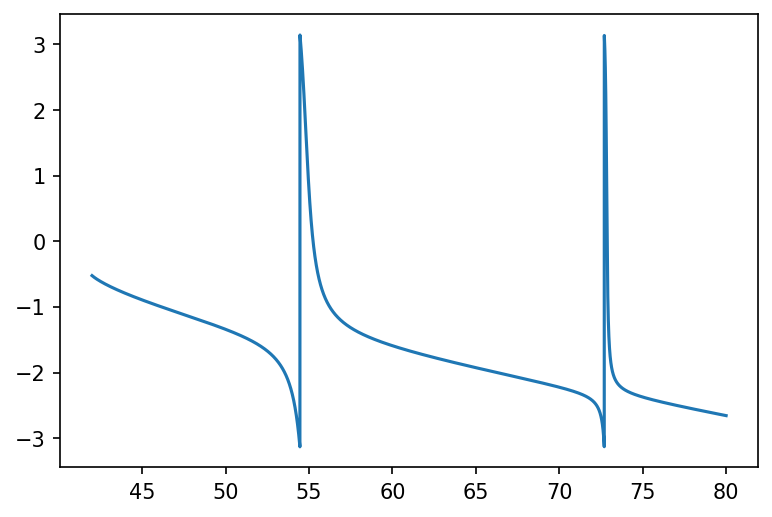

In [2]:
incidence,r,t,R,T = Angular(prism_coupler,wl,0,42,80,10000)
plt.plot(incidence,np.angle(r))
plt.show()


There are obviously two guided modes. The second one is less easy to excite, due to a large wavevector. But we can try to see what occurs around 55°, for the first guided mode. It is actually not the fundamental, but the first harmonic: it presents two lobes.


Pixels horizontally: 3000
Incidence in degrees: 55.0
E//, TE, s polarization
Pixels vertically: 198


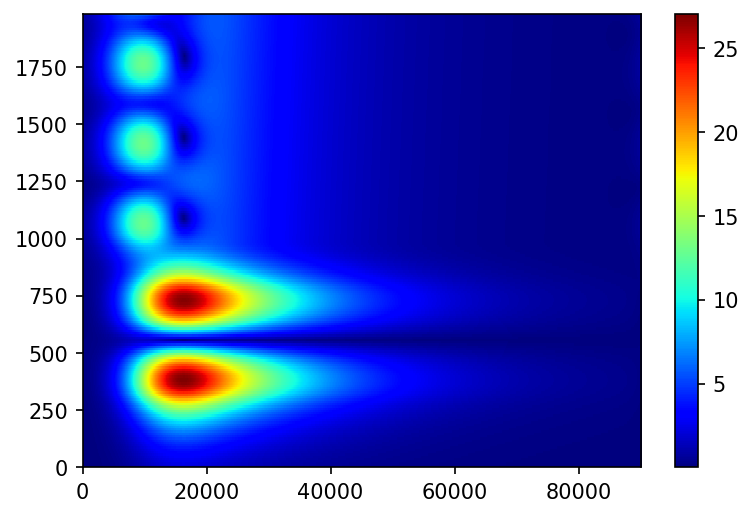

In [3]:
domain = Window(150*wl,0.1,30.,10.)
beam = Beam(wl,55/180*np.pi,0,10*wl)
E = field(prism_coupler,beam,domain)
plt.figure(2)
plt.imshow(abs(E),cmap='jet',extent=[0,domain.width,0,sum(prism_coupler.thickness)],aspect='auto')
plt.colorbar()

## Coupled waveguides and cross-talk / Rabi oscillations

In [4]:
coupled = Structure([1.,2.25],[1,0,1,0,1,0],[1000,200,500,300,500,300])

List of materials:
Simple, non dispersive: epsilon= 1.0
Simple, non dispersive: epsilon= 2.25


Pixels horizontally: 5000
Pixels vertically: 280


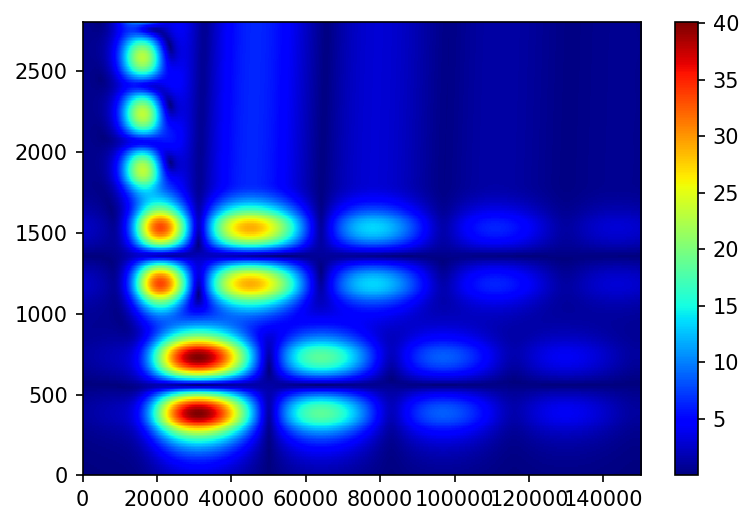

In [5]:
domain = Window(250*wl,0.1,30.,10.)
E = field(coupled,beam,domain)
plt.figure(2)
plt.imshow(abs(E),cmap='jet',extent=[0,domain.width,0,sum(coupled.thickness)],aspect='auto')
plt.colorbar()

What we are seeing is the guided mode in the upper waveguide being transferred to the second one by evanescent coupling (tunneling if you like) and then back in the upper waveguide where is leaks in the prism. Since it leaks only half of the time, light propagates further than when only one waveguide is present. This is an exotic non-specular effect, as [described in this paper](https://www.dropbox.com/s/l8h9v1eka44ik70/Non_Specular-JEOS.pdf?dl=0)